<a href="https://colab.research.google.com/github/K-2315/WIDS-/blob/main/WIDS%20WEEK%203%20LAB%207%20ASSIGNMENT%20SUBMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

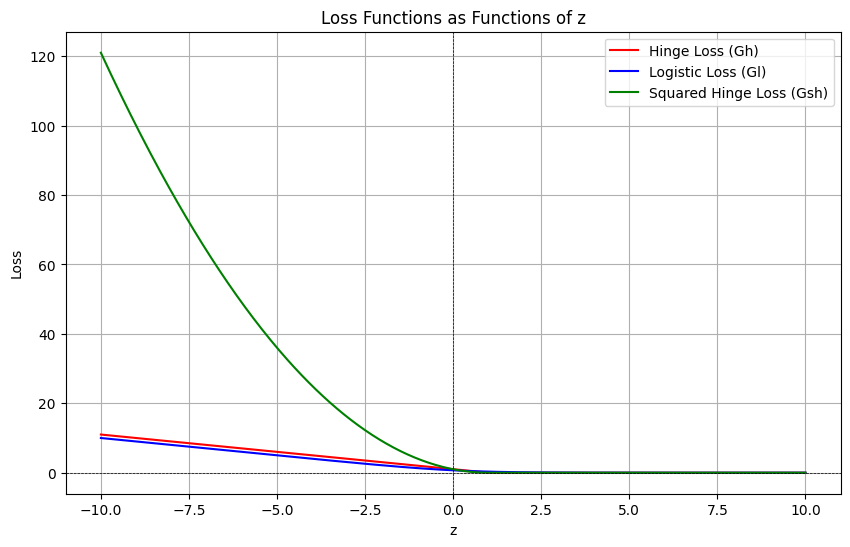

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Gh(z):
    return np.maximum(0, 1 - z)

def Gl(z):
    return np.log(1 + np.exp(-z))

def Gsh(z):
    return np.maximum(0, 1 - z) ** 2

z = np.linspace(-10, 10, 500)
hinge_loss = Gh(z)
logistic_loss = Gl(z)
squared_hinge_loss = Gsh(z)
plt.figure(figsize=(10, 6))
plt.plot(z, hinge_loss, label="Hinge Loss (Gh)", color="red")
plt.plot(z, logistic_loss, label="Logistic Loss (Gl)", color="blue")
plt.plot(z, squared_hinge_loss, label="Squared Hinge Loss (Gsh)", color="green")
plt.title("Loss Functions as Functions of z")
plt.xlabel("z")
plt.ylabel("Loss")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()



In [5]:
from sklearn.datasets import load_iris
import numpy as np

data = load_iris()
A = data['data']
y = data['target']

classes = np.unique(y)
C = len(classes)
print("Number of classes:", C)
print("Class label values:", classes)


if set(classes) == set(range(C)):
    y = np.where(y == 0, 1, -1)
else:
    y = np.where(y == 1, 1, -1)

print("Modified labels:", np.unique(y))


np.random.seed(42)
indexarr = np.random.permutation(len(A))


split_index = int(0.8 * len(A))
train_indices = indexarr[:split_index]
test_indices = indexarr[split_index:]

train_data = A[train_indices]
train_label = y[train_indices]
test_data = A[test_indices]
test_label = y[test_indices]

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_label.shape)


def predict(x, w):
    """Prediction rule h(x) = sign(w^T x)."""
    return np.sign(np.dot(w, x))

np.random.seed(42)
w = np.random.randn(train_data.shape[1])
sample = test_data[0]
print("First test sample",test_data[0])
prediction = predict(sample, w)
print("Prediction for the first test sample:", prediction)


Number of classes: 3
Class label values: [0 1 2]
Modified labels: [-1  1]
Train data shape: (120, 4)
Train label shape: (120,)
Test data shape: (30, 4)
Test label shape: (30,)
First test sample [6.1 3.  4.6 1.4]
Prediction for the first test sample: 1.0


In [6]:
from sklearn.datasets import load_iris
import numpy as np

data = load_iris()
A = data['data']
y = data['target']


classes = np.unique(y)
C = len(classes)
print("Number of classes:", C)
print("Class label values:", classes)


if set(classes) == set(range(C)):
    y = np.where(y == 0, 1, -1)
else:
    y = np.where(y == 1, 1, -1)

print("Modified labels:", list(np.unique(y)))

np.random.seed(42)
indexarr = np.random.permutation(len(A))


split_index = int(0.8 * len(A))
train_indices = indexarr[:split_index]
test_indices = indexarr[split_index:]

train_data = A[train_indices]
train_label = y[train_indices]
test_data = A[test_indices]
test_label = y[test_indices]

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_label.shape)


def Lh(y_i, w, x_i):
    return max(0, 1 - y_i * np.dot(w, x_i))


def objective_function(w, X, y, lam):
    n = len(y)
    reg_term = (lam / 2) * np.dot(w, w)
    loss_term = sum(Lh(y[i], w, X[i]) for i in range(n)) / n
    return reg_term + loss_term

def gradient_Lh(y_i, w, x_i):

    if 1 - y_i * np.dot(w, x_i) > 0:
        return -y_i * x_i
    else:
        return np.zeros_like(w)

def sgd_hinge_loss(train_data, train_label, lam, lr, epochs):
    n, d = train_data.shape
    w = np.zeros(d)

    for epoch in range(epochs):
        for i in range(n):
            x_i = train_data[i]
            y_i = train_label[i]
            grad = gradient_Lh(y_i, w, x_i) + lam * w
            w -= lr * grad
        obj_value = objective_function(w, train_data, train_label, lam)
        print(f"Epoch {epoch + 1}/{epochs}, Objective Function Value: {obj_value}")

    return w


lam = 0.01
lr = 0.01
epochs = 10

optimized_w = sgd_hinge_loss(train_data, train_label, lam, lr, epochs)
print("Optimized weights:", optimized_w)

Number of classes: 3
Class label values: [0 1 2]
Modified labels: [-1, 1]
Train data shape: (120, 4)
Train label shape: (120,)
Test data shape: (30, 4)
Test label shape: (30,)
Epoch 1/10, Objective Function Value: 0.09345737526456022
Epoch 2/10, Objective Function Value: 0.027041643457460626
Epoch 3/10, Objective Function Value: 0.05196477671300435
Epoch 4/10, Objective Function Value: 0.02244694538284386
Epoch 5/10, Objective Function Value: 0.008158593293673596
Epoch 6/10, Objective Function Value: 0.008132024687929612
Epoch 7/10, Objective Function Value: 0.009325881868972121
Epoch 8/10, Objective Function Value: 0.017636526815851674
Epoch 9/10, Objective Function Value: 0.008428657348289806
Epoch 10/10, Objective Function Value: 0.007877272446797689
Optimized weights: [ 0.1559875   0.61949264 -0.93037976 -0.45360016]
